In [1]:
''' Objective: create a model that can take a description of a book and match it with a publisher'''

''' Imagine being an proud author of a book which you want to publish. Who would you choose?'''
''' My model will take your book description and give you a recommendation'''
''' This will be the publisher who will most likey publish your book!'''
''' Enjoy!'''


' Enjoy!'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statistics import mean 
import os 
import glob
from pathlib import Path
from langdetect import detect
import re

In [3]:
os.getcwd()

'/Users/zakir/DS Projects'

In [4]:
df = pd.concat([pd.read_csv(str(x.resolve())) for x in Path("/Users/zakir/DS Projects/goodreads_csv_file").glob("*k.csv")])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 34758
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   Name                   object 
 2   Authors                object 
 3   ISBN                   object 
 4   Rating                 float64
 5   PublishYear            int64  
 6   PublishMonth           int64  
 7   PublishDay             int64  
 8   Publisher              object 
 9   RatingDist5            object 
 10  RatingDist4            object 
 11  RatingDist3            object 
 12  RatingDist2            object 
 13  RatingDist1            object 
 14  RatingDistTotal        object 
 15  CountsOfReview         int64  
 16  Language               object 
 17  PagesNumber            float64
 18  Description            object 
 19  pagesNumber            float64
 20  Count of text reviews  float64
dtypes: float64(4), int64(5), object(12)
memory usage: 310.6+

In [6]:
df.dtypes

Id                         int64
Name                      object
Authors                   object
ISBN                      object
Rating                   float64
PublishYear                int64
PublishMonth               int64
PublishDay                 int64
Publisher                 object
RatingDist5               object
RatingDist4               object
RatingDist3               object
RatingDist2               object
RatingDist1               object
RatingDistTotal           object
CountsOfReview             int64
Language                  object
PagesNumber              float64
Description               object
pagesNumber              float64
Count of text reviews    float64
dtype: object

In [7]:
df.describe()

,Id,Rating,PublishYear,PublishMonth,PublishDay,CountsOfReview,PagesNumber,pagesNumber,Count of text reviews
count,1.850310e+06,1.850310e+06,1.850310e+06,1.850310e+06,1.850310e+06,1.850310e+06,1.015232e+06,8.350780e+05,409697.000000
mean,2.111590e+06,2.894243e+00,1.997841e+03,7.700550e+00,7.987211e+00,1.158022e+01,2.735816e+02,2.801624e+02,7.172742
std,1.408184e+06,1.725019e+00,8.789461e+01,7.756940e+00,8.431777e+00,2.952674e+02,4.521817e+03,5.537951e+03,124.838833
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.273325e+05,2.000000e+00,1.993000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.410000e+02,1.500000e+02,0.000000
50%,2.017784e+06,3.680000e+00,2.000000e+03,6.000000e+00,5.000000e+00,0.000000e+00,2.320000e+02,2.400000e+02,1.000000
75%,3.200679e+06,4.000000e+00,2.005000e+03,1.100000e+01,1.100000e+01,2.000000e+00,3.360000e+02,3.400000e+02,3.000000
max,4.846451e+06,5.000000e+00,6.553500e+04,3.100000e+01,3.100000e+01,1.544470e+05,4.517845e+06,4.517845e+06,43652.000000


In [8]:
df.head(10)

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,pagesNumber,Count of text reviews
0,1900511,Barbarossa,Christopher Ailsby,1840138009,3.00,2007,4,1,New Line Books,5:0,...,3:1,2:0,1:0,total:1,0,NaN,192.0,"On 22 June 1941, Adolf Hitler launched Operati...",NaN,NaN
1,1900512,Collector's Guide to German World War II: Comb...,Christopher Ailsby,0781802253,0.00,1994,7,1,Hippocrene Books,5:0,...,3:0,2:0,1:0,total:0,0,NaN,160.0,NaN,NaN,NaN
2,1900514,Images of Barbarossa,Christopher Ailsby,0711028257,3.50,2001,1,25,Ian Allan Ltd,5:0,...,3:2,2:1,1:0,total:8,0,NaN,256.0,"On 22 June 1941, Adolf Hitler launched Operati...",NaN,NaN
3,1900520,Romania After 2000: Five New Romanian Plays,Daniel Charles Gerould,0595436560,4.00,2007,9,1,Martin E. Segal Theatre Center Publications,5:1,...,3:1,2:0,1:0,total:6,0,NaN,226.0,The first anthology of new Romanian Drama publ...,NaN,NaN
4,1900521,Global Foreigners: An Anthology of Plays,Saviana Stănescu,1905422423,4.60,2006,12,7,Seagull Books,5:4,...,3:1,2:0,1:0,total:5,0,NaN,320.0,"In Waxing West, Daniella, newly arrived in the...",NaN,NaN
5,1900525,Diary of a Clone,Saviana Stănescu,092338961X,4.80,2003,1,1,Meeting Eyes Bindery,5:4,...,3:0,2:0,1:0,total:5,0,NaN,66.0,Poetry. Translation. DIARY OF A CLONE is a sma...,NaN,NaN
6,1900528,Die Valenztheorie: Bestandsaufnahme Und Perspe...,Speranta Stanescu,3631512082,0.00,2004,2,24,"Peter Lang Gmbh, Internationaler Verlag Der Wi...",5:0,...,3:0,2:0,1:0,total:0,0,NaN,336.0,Die <i>Hermannstadter Tagung</i> stellte im Ja...,NaN,NaN
7,1900535,The Challenge of Carl Schmitt,Chantal Mouffe,1859847048,3.44,1999,9,17,Verso,5:4,...,3:19,2:2,1:3,total:50,0,NaN,228.0,Carl Schmitt’s thought serves as a warning aga...,NaN,NaN
8,1900548,Motor Disturbance,Kenward Elmslie,0231036124,5.00,1971,1,1,Frank O'Hara Foundation,5:7,...,3:0,2:0,1:0,total:7,0,NaN,75.0,NaN,NaN,NaN
9,1900550,Motor Disturbances Ii: A Selection Of Papers D...,A. Berardelli,0120894459,0.00,1990,1,1,Academic Press,5:0,...,3:0,2:0,1:0,total:0,0,NaN,440.0,NaN,NaN,NaN


In [9]:
df.tail(20)

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,pagesNumber,Count of text reviews
34739,1499937,"Detroit's Street Railways: City Lines, 1863 1922",Jack E. Schramm,0915348179,4.00,1978,1,2,Central Electric Railfans' Association,5:1,...,3:1,2:0,1:0,total:2,0,NaN,NaN,NaN,192.0,0.0
34740,1499939,Julius Caesar,William Shakespeare,0618031480,3.69,2000,15,3,Houghton Mifflin,5:39184,...,3:49285,2:14896,1:3938,total:164381,1,NaN,NaN,Shakespeare may have written <i>Julius Caesar<...,175.0,1.0
34741,1499953,Advanced Topics in Labwindows/CVI,Shahid F. Khalid,0130892297,5.00,2001,11,11,Prentice Hall,5:2,...,3:0,2:0,1:0,total:2,0,NaN,NaN,This book will be targeted towards the audienc...,421.0,0.0
34742,1499955,Black's Law Dictionary: Definitions of the Ter...,Henry Campbell Black,0314771352,4.36,1983,1,12,West Publishing Company,5:455,...,3:84,2:21,1:17,total:766,1,NaN,NaN,For more than a century Black's has been the g...,855.0,1.0
34743,1499956,Briefcase on Commercial Law,Michael J. Connolly,1859412416,0.00,1995,26,9,Routledge Cavendish,5:0,...,3:0,2:0,1:0,total:0,0,NaN,NaN,NaN,226.0,0.0
34744,1499959,Structural Macroeconometrics,David N. DeJong,0691126488,4.22,2007,1,3,Princeton University Press,5:6,...,3:2,2:1,1:0,total:9,0,NaN,NaN,Methodologies for analyzing the forces that mo...,338.0,0.0
34745,1499961,The 2012 Bid,Chetan Dave,1420862278,2.00,2005,23,6,Authorhouse,5:0,...,3:0,2:1,1:0,total:1,0,NaN,NaN,The race to secure the bid for the Summer Game...,136.0,0.0
34746,1499963,Wireless Data Services,Yasuhisa Nakamura,0521828430,4.50,2003,20,11,Cambridge University Press,5:1,...,3:0,2:0,1:0,total:2,0,NaN,NaN,"Despite their phenomenal global growth, wirele...",400.0,0.0
34747,1499964,Poder del pensamiento tenaz,Norman Vincent Peale,1400084709,4.15,2003,1,11,Grijalbo,5:37784,...,3:13544,2:3362,1:1871,total:80896,1,NaN,NaN,"<i>""This book is written with the sole objecti...",288.0,1.0
34748,1499966,Approaching the Land of Bliss: Religious Praxi...,Richard K. Payne,0824825780,4.00,2003,30,9,University of Hawaii Press,5:0,...,3:0,2:0,1:0,total:1,1,NaN,NaN,The discourse of Buddhist studies has traditio...,304.0,1.0


In [10]:
#i was able to find there is a language column... i have to find out how many unique languages there are 
df.Language.unique()

array([nan, 'eng', 'en-US', 'en-GB', 'fre', 'spa', 'swe', 'ger', 'ita',
       'sco', 'rum', 'pol', 'jpn', 'nl', 'por', 'zho', 'kor', 'ind',
       'lat', 'gmh', 'msa', 'mul', 'per', 'eus', 'nor', 'wel', 'enm',
       'rus', 'grc', 'ara', 'ave', 'tur', 'epo', 'dan', 'mga', 'gla',
       'gre', 'scr', 'fin', 'gle', 'en-CA', 'srp', 'isl', 'tha', 'urd',
       'cze', 'glg', 'frs', 'wak', 'heb', 'hun', 'guj', 'chp', 'raj',
       'hin', 'cat', 'ang', 'afr', 'ypk', 'frm', 'nav', 'myn', 'elx',
       'tlh', 'tah', 'slv', 'bul', 'slo', 'mar', 'tli', 'san', 'cop',
       'tel', 'gem', 'haw', 'tib', 'sam', '--', 'fan', 'est', 'lav',
       'yid', 'nld', 'tgl', 'hye', 'sqi', 'ben', 'mal', 'ada', 'zap',
       'aus', 'kur', 'nob', 'nep', 'nai', 'lit', 'fro', 'bos', 'hmn',
       'cre', 'nub', 'tam', 'lao', 'fil', 'nqo', 'chi', 'som', 'rar',
       'vie', 'goh', 'jav', 'mri', 'che', 'sna', 'aze', 'myv', 'zul',
       'ira', 'ssw', 'mis', 'zun', 'dum', 'mah', 'kan', 'non'],
      dtype=object)

In [11]:
df['Language'].unique()

array([nan, 'eng', 'en-US', 'en-GB', 'fre', 'spa', 'swe', 'ger', 'ita',
       'sco', 'rum', 'pol', 'jpn', 'nl', 'por', 'zho', 'kor', 'ind',
       'lat', 'gmh', 'msa', 'mul', 'per', 'eus', 'nor', 'wel', 'enm',
       'rus', 'grc', 'ara', 'ave', 'tur', 'epo', 'dan', 'mga', 'gla',
       'gre', 'scr', 'fin', 'gle', 'en-CA', 'srp', 'isl', 'tha', 'urd',
       'cze', 'glg', 'frs', 'wak', 'heb', 'hun', 'guj', 'chp', 'raj',
       'hin', 'cat', 'ang', 'afr', 'ypk', 'frm', 'nav', 'myn', 'elx',
       'tlh', 'tah', 'slv', 'bul', 'slo', 'mar', 'tli', 'san', 'cop',
       'tel', 'gem', 'haw', 'tib', 'sam', '--', 'fan', 'est', 'lav',
       'yid', 'nld', 'tgl', 'hye', 'sqi', 'ben', 'mal', 'ada', 'zap',
       'aus', 'kur', 'nob', 'nep', 'nai', 'lit', 'fro', 'bos', 'hmn',
       'cre', 'nub', 'tam', 'lao', 'fil', 'nqo', 'chi', 'som', 'rar',
       'vie', 'goh', 'jav', 'mri', 'che', 'sna', 'aze', 'myv', 'zul',
       'ira', 'ssw', 'mis', 'zun', 'dum', 'mah', 'kan', 'non'],
      dtype=object)

In [12]:
# I may want to drop non english descriptions. How can I make sure it wont have a significant effect on my data? 

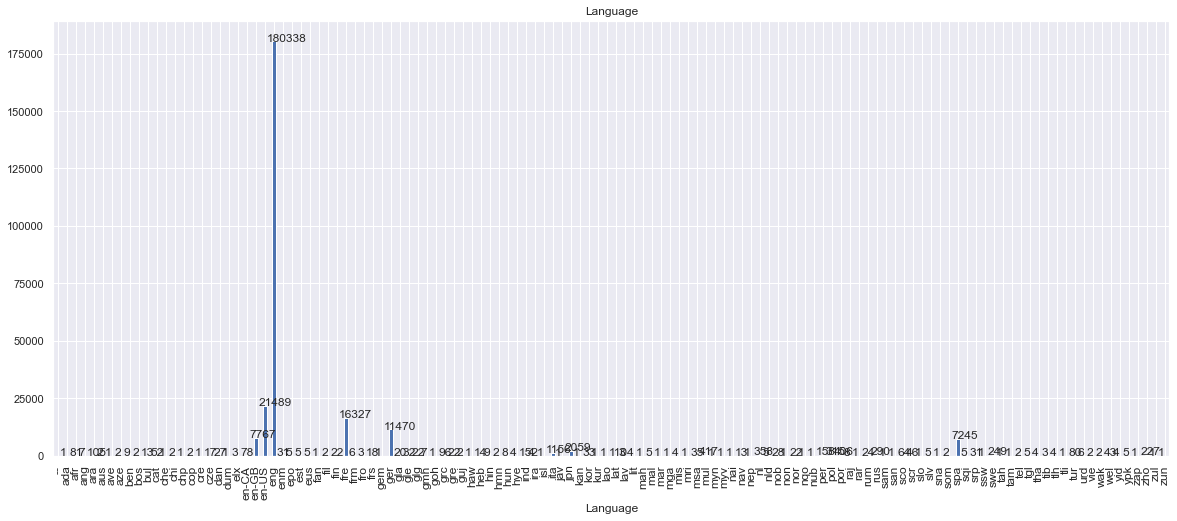

In [13]:

sns.set(rc = {'figure.figsize':(20,8)})
ax = df.groupby('Language')['Name'].count().plot.bar()
plt.title('Language')
plt.xticks(fontsize = 12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.5, p.get_height()+100))

In [14]:
df['Language'].replace(['en-GB','en-US','en-CA'],'eng', inplace = True)

In [15]:
df.Language.unique()

array([nan, 'eng', 'fre', 'spa', 'swe', 'ger', 'ita', 'sco', 'rum', 'pol',
       'jpn', 'nl', 'por', 'zho', 'kor', 'ind', 'lat', 'gmh', 'msa',
       'mul', 'per', 'eus', 'nor', 'wel', 'enm', 'rus', 'grc', 'ara',
       'ave', 'tur', 'epo', 'dan', 'mga', 'gla', 'gre', 'scr', 'fin',
       'gle', 'srp', 'isl', 'tha', 'urd', 'cze', 'glg', 'frs', 'wak',
       'heb', 'hun', 'guj', 'chp', 'raj', 'hin', 'cat', 'ang', 'afr',
       'ypk', 'frm', 'nav', 'myn', 'elx', 'tlh', 'tah', 'slv', 'bul',
       'slo', 'mar', 'tli', 'san', 'cop', 'tel', 'gem', 'haw', 'tib',
       'sam', '--', 'fan', 'est', 'lav', 'yid', 'nld', 'tgl', 'hye',
       'sqi', 'ben', 'mal', 'ada', 'zap', 'aus', 'kur', 'nob', 'nep',
       'nai', 'lit', 'fro', 'bos', 'hmn', 'cre', 'nub', 'tam', 'lao',
       'fil', 'nqo', 'chi', 'som', 'rar', 'vie', 'goh', 'jav', 'mri',
       'che', 'sna', 'aze', 'myv', 'zul', 'ira', 'ssw', 'mis', 'zun',
       'dum', 'mah', 'kan', 'non'], dtype=object)

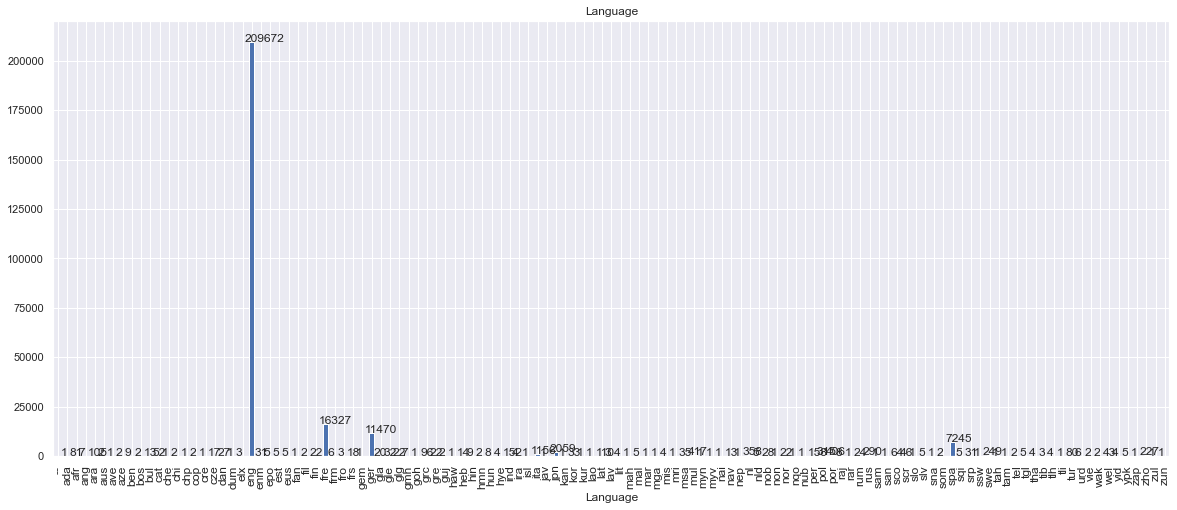

In [16]:
sns.set(rc = {'figure.figsize':(20,8)})
ax = df.groupby('Language')['Name'].count().plot.bar()
plt.title('Language')
plt.xticks(fontsize = 12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.5, p.get_height()+100))

In [17]:
# Initially I wanted to drop all non english books
# But, I may not need to drop those books because I may be able to make the model do it automatically. 

In [18]:
# There are a lot of NAN values in the Description column
# Initially I wanted to remove all these values
# But I can at least replace those with the Name of the book instead, which has zero NAN values. 

In [19]:
df.isnull().sum()

Id                             0
Name                           0
Authors                        0
ISBN                        5923
Rating                         0
PublishYear                    0
PublishMonth                   0
PublishDay                     0
Publisher                  17826
RatingDist5                    0
RatingDist4                    0
RatingDist3                    0
RatingDist2                    0
RatingDist1                    0
RatingDistTotal                0
CountsOfReview                 0
Language                 1598488
PagesNumber               835078
Description               679122
pagesNumber              1015232
Count of text reviews    1440613
dtype: int64

In [20]:
df.Description.fillna(df.Name, inplace=True)

In [21]:
df.isnull().sum()

Id                             0
Name                           0
Authors                        0
ISBN                        5923
Rating                         0
PublishYear                    0
PublishMonth                   0
PublishDay                     0
Publisher                  17826
RatingDist5                    0
RatingDist4                    0
RatingDist3                    0
RatingDist2                    0
RatingDist1                    0
RatingDistTotal                0
CountsOfReview                 0
Language                 1598488
PagesNumber               835078
Description                    0
pagesNumber              1015232
Count of text reviews    1440613
dtype: int64

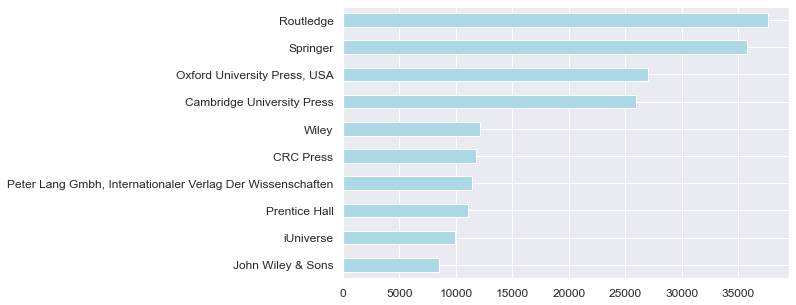

In [22]:
# I want to see the top companies that published the most books. 
# Due to the sheer volume and memory issues it will create, 
# I decided to work with the top 10 publishers 
df['Publisher'].value_counts()[:10].plot(kind = 'barh', figsize =[8,5], fontsize = 12, color = 'lightblue').invert_yaxis()

In [23]:
# Now I want to create a new dataframe with the relevant columns 
df1 = df[['Publisher','Description']]
df1.head()

,Publisher,Description
0,New Line Books,"On 22 June 1941, Adolf Hitler launched Operati..."
1,Hippocrene Books,Collector's Guide to German World War II: Comb...
2,Ian Allan Ltd,"On 22 June 1941, Adolf Hitler launched Operati..."
3,Martin E. Segal Theatre Center Publications,The first anthology of new Romanian Drama publ...
4,Seagull Books,"In Waxing West, Daniella, newly arrived in the..."


In [24]:
df1.isnull().sum()

Publisher      17826
Description        0
dtype: int64

In [25]:
# Hmm... lets limit df1 to the top 10 publishers and see if there are null values there
''' Question: Is there a better way to do this instead of the code below?'''

' Question: Is there a better way to do this instead of the code below?'

In [26]:
df1=df1.loc[(df1["Publisher"]=="Routledge") | (df1["Publisher"]=="Springer") | (df1["Publisher"]=="Oxford University Press, USA") | (df1["Publisher"]=="Cambridge University Press") | (df1["Publisher"]=="Wiley") | (df1["Publisher"]=="CRC Press") | (df1["Publisher"]=="Peter Lang Gmbh, Internationaler Verlag Der Wissenschaften") | (df1["Publisher"]=="Prentice Hall")| (df1["Publisher"]=="iUniverse") | (df1["Publisher"]=="John Wiley & Sons"),["Publisher","Description"]]

In [27]:
df1.isnull().sum()
# Looks good!

Publisher      0
Description    0
dtype: int64

In [28]:
# categorical variables should be turned into numbers for ML algorithm 
# since we are working with only the top 10 publishers here, 
# the categorical variables will be the publishers
# will create a copy of df1 and a new column with the factorized categories
df2 = df1.copy()


In [29]:
df2['Publisher_id'] = df2['Publisher'].factorize()[0]

In [30]:
df2

,Publisher,Description,Publisher_id
6,"Peter Lang Gmbh, Internationaler Verlag Der Wi...",Die <i>Hermannstadter Tagung</i> stellte im Ja...,0
54,Cambridge University Press,This book compares resistance to technology ac...,1
55,Routledge,"""Atom,"" ""byte"" and ""gene"" are metonymies for t...",2
66,iUniverse,A fun and mischievous adventure story centered...,3
73,John Wiley & Sons,"In this introductory book, Groover not only ta...",4
...,...,...,...
34686,Springer,This book describes the recursive partitioning...,6
34717,John Wiley & Sons,"THE LIVING CITY<br /><br />""An intelligent ana...",4
34719,"Oxford University Press, USA",What is it that accounts for the differences b...,7
34741,Prentice Hall,This book will be targeted towards the audienc...,5


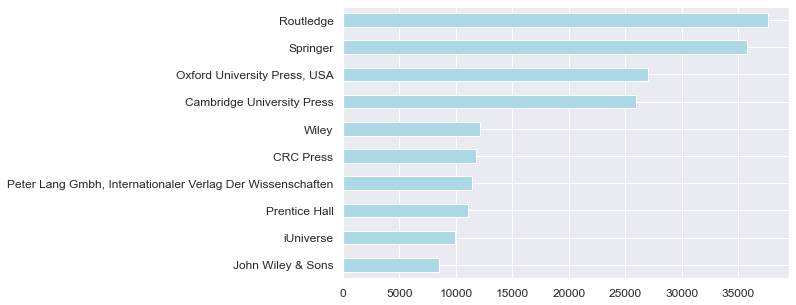

In [31]:
df2['Publisher'].value_counts().plot(kind = 'barh', figsize =[8,5], fontsize = 12, color = 'lightblue').invert_yaxis()

In [32]:
# I think at this point I am ready to try to vectorize the words
# I am going to go with tf-idf because I like how tf-idf reflects some sort of semantics 

In [33]:
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [34]:
# I dont have the ram to process all this data
# I will have to decrease the dataset 
df3 = df2[:5000].copy()
df3['Publisher'].unique()

array(['Peter Lang Gmbh, Internationaler Verlag Der Wissenschaften',
       'Cambridge University Press', 'Routledge', 'iUniverse',
       'John Wiley & Sons', 'Prentice Hall', 'Springer',
       'Oxford University Press, USA', 'CRC Press', 'Wiley'], dtype=object)

In [35]:
# I may need to factorize the publisher column for the ML algorithm
df3['Publisher_id'] = df3['Publisher'].factorize()[0]

In [48]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

X = tfidf.fit(df3.Description) 
X = tfidf.transform(df3.Description).toarray()
y = df3.Publisher_id


In [37]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X, 
                                                               y, 
                                                               df3.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred, target_names=df3['Publisher'].unique()))

                                                            precision    recall  f1-score   support

Peter Lang Gmbh, Internationaler Verlag Der Wissenschaften       0.83      0.58      0.68        52
                                Cambridge University Press       0.47      0.45      0.46       165
                                                 Routledge       0.58      0.68      0.62       237
                                                 iUniverse       0.57      0.77      0.66        78
                                         John Wiley & Sons       0.29      0.10      0.15        39
                                             Prentice Hall       0.47      0.35      0.40        78
                                                  Springer       0.63      0.75      0.68       244
                              Oxford University Press, USA       0.44      0.41      0.42       176
                                                 CRC Press       0.54      0.43      0.48        75

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [41]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [42]:
model = LinearSVC().fit(X_train, y_train)

In [50]:
testing = 'hello world'
model.predict(tfidf.fit(X_train).transform([testing]))

AttributeError: 'numpy.ndarray' object has no attribute 'lower'